# Clasificación

En aprendizaje de máquinas, la clasificación es el problema de identificar a qué clase (de un grupo finito de clases) una observación nueva pertenece, tomando como base un entrenamiento previo sobre un grupo de observaciones donde sí se conocían sus clases correspondientes.

In [1]:
import pandas as pd
import sklearn.linear_model # Algoritmos lineales como el Perceptron
import sklearn.tree # Árboles
import sklearn.neural_network # Perceptón multicapa
import sklearn.model_selection # Funciones para preprocesar nuestros datos
import sklearn.tree
import sklearn.metrics # Métricas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
simplest = pd.read_csv("data/simplest.csv")

In [3]:
simplest.head() # Importamos nuestros datos etiquetados (columna y)

,x1,x2,y
0,1.812018,1.033985,1
1,-2.627158,-2.016127,0
2,-3.023353,1.481023,1
3,2.800382,-2.410295,0
4,-1.836262,2.381069,1


Verificamos la distribución que tienen nuestros datos

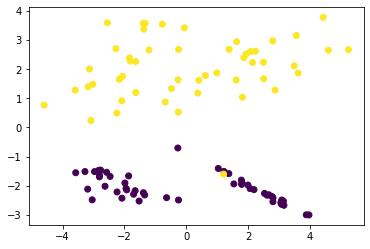

In [4]:
plt.scatter(
    simplest.x1,
    simplest.x2,
    c = simplest.y # Pintamos nuestros puntos según la etiqueta que tengan
)

## Preprocesamiento

Para poder evaluar los desempeños de nuestros modelos de la manera más válida posible, se suele dividir nuestro conjunto de datos un en subconjunto de entrenamiento y uno de prueba. El subconjunto de entrenamiento es el único que utilizaremos para entrenar nuestro modelo. El subconjunto de prueba es independiente al de entrenamiento y con este evaluamos las métricas de desempeño de nuestro modelo.

Para fácilemente realizar esta separación utilizamos la función `sklearn.model_selection.train_test_split()`

In [5]:
simplest_features = simplest.iloc[:,:-1] # Seleccionamos sólo las características de nuestro conjunto de datos

In [6]:
simplest_label = simplest.y# Seleccionamos sólo la etiqueta de nuestro conjunto de datos

In [7]:
# Dividimos nuestro conjunto de datos en subconjuntos de entrenamiento y prueba

simplest_features_train, simplest_features_test, simplest_label_train, simplest_label_test = sklearn.model_selection.train_test_split(
    simplest_features,
    simplest_label,
    test_size=0.33, # Tamaño del conjunto de prueba
    random_state=11 # Bloqueamos el generador de números al azar con una semilla
)

## Perceptrón

Ajustaremos un único perceptrón para poder separar las clases de nuestros datos.

In [8]:
p = sklearn.linear_model.Perceptron() # Instanciamos nuestro perceptrón
p.fit(
    simplest_features_train,
    simplest_label_train
) # Ajustamos el perceptrón con los datos de entrenamiento

Perceptron()

Para evaluar el rendimiento de nuestro clasificador, calcularemos la matriz de confusión sobre el subconjunto de entrenamiento utilizando la función `sklearn.metrics.confusion_matrix()`

In [9]:
p_cm = sklearn.metrics.confusion_matrix(
    simplest_label_test, # Etiquetas reales del conjunto de prueba
    p.predict(simplest_features_test) # Etiquetas predichas por el modelo
)
p_cm

array([[17,  0],
       [ 0, 16]], dtype=int64)

### Actividad 1
**Programa una función que reciban una matriz de confusión y que calcule alguna métrica de clasificación.**

In [10]:
def accuracy(cm):
    accuracy = 0 # ¡Prográmame!
    return accuracy

In [11]:
accuracy(p_cm)

0

Exploremos los parámetros ajustados de nuestro perceptrón

In [12]:
p.coef_ # Los pesos asociados a cada una de las variables

array([[1.10152364, 6.66922198]])

In [13]:
p.intercept_ # El sesgo asociado al perceptrón

array([4.])

En este artículo pueden aprender como encontrar la pendiente y el intercepto asociados a nuestro perceptrón. https://stackoverflow.com/questions/31292393/how-do-you-draw-a-line-using-the-weight-vector-in-a-linear-perceptron

In [14]:
slope = -( p.intercept_ / p.coef_[0][1] ) / ( p.intercept_ / p.coef_[0][0] ) # Pendiente asociada al umbral de clasificación
intercept = -p.intercept_ / p.coef_[0][1] # Intercepto asociado al umbral de clasificación

In [15]:
# Calculemos 2 puntos para trazar una linea asociada al umbral de clasificación
db_x = np.array(
    [simplest_features_test.x1.min(),
    simplest_features_test.x1.max()]
)
db_y = slope * db_x + intercept

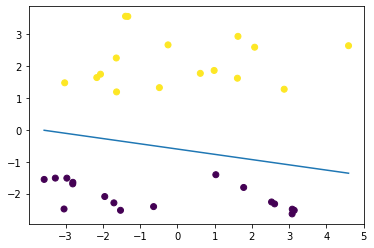

In [16]:
plt.scatter(
    simplest_features_test.x1,
    simplest_features_test.x2,
    c = simplest_label_test
)

# Graficamos nuestro umbral de clasificación

plt.plot(
    db_x,
    db_y
)

In [17]:
checkerboard = pd.read_csv("data/checkerboard.csv") # Importamos un nuevo conjunto de datos

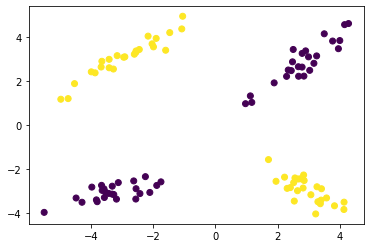

In [18]:
plt.scatter(
    checkerboard.x1,
    checkerboard.x2,
    c = checkerboard.y
)

In [19]:
checkerboard_features = checkerboard.iloc[:,:-1]

In [20]:
checkerboard_label = checkerboard.y

In [21]:
checkerboard_features_train, checkerboard_features_test, checkerboard_label_train, checkerboard_label_test = sklearn.model_selection.train_test_split(
    checkerboard_features,
    checkerboard_label,
    test_size=0.33,
    random_state=11
)

Entrenemos un nuevo perceptrón

In [22]:
p1 = sklearn.linear_model.Perceptron()
p1.fit(
    checkerboard_features_train,
    checkerboard_label_train
)

Perceptron()

In [23]:
p1_cm = sklearn.metrics.confusion_matrix(
    checkerboard_label_test,
    p.predict(checkerboard_features_test)
)
p1_cm

array([[ 8, 10],
       [ 8,  7]], dtype=int64)

In [24]:
accuracy(p1_cm)

0

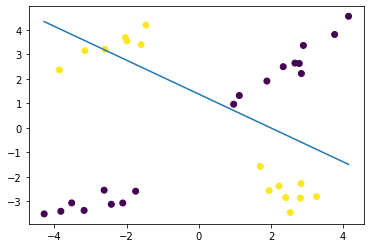

In [25]:
slope = -( p1.intercept_ / p1.coef_[0][1] ) / ( p1.intercept_ / p1.coef_[0][0] )  
intercept = -p1.intercept_ / p1.coef_[0][1]
db_x = np.array(
    [checkerboard_features_test.x1.min(),
    checkerboard_features_test.x1.max()]
)
db_y = slope * db_x + intercept
plt.scatter(
    checkerboard_features_test.x1,
    checkerboard_features_test.x2,
    c = checkerboard_label_test
)

plt.plot(
    db_x,
    db_y
)

### Actividad 2
**¿El perceptrón es un buen método para esta tarea y por qué?. Sí sólo pudieses usar perceptrones, ¿cuál crees que sería un buen número a utilizar y cómo los ordenarías?, prográmalo.**

Planifica tu arquitectura utilizando Tensorflow Playground

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=1&seed=0.38047&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [26]:
# TODO: Código para perceptrones múltiples para clasificar el conjunto de datos checkerboard
# HINT: Documentación del perceptrón multicapa https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
# Implementa lo que aprendiste en TensorFlow Playground e implementalo acá.
mlp = sklearn.neural_network.MLPClassifier()

# Árbol de decisión

In [27]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=1, criterion = "entropy") # Instanciamos nuestro árbol de decisión
tree.fit(
    simplest_features_train,
    simplest_label_train
) # Ajustamos el árbol con los datos de entrenamiento

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [28]:
tree_cm = sklearn.metrics.confusion_matrix(
    simplest_label_test, # Etiquetas reales del conjunto de prueba
    tree.predict(simplest_features_test) # Etiquetas predichas por el modelo
)
tree_cm

array([[17,  0],
       [ 0, 16]], dtype=int64)

In [29]:
accuracy(tree_cm)

0

Así se ve un árbol de decisión de profundidad 1 (sólo una decisión).

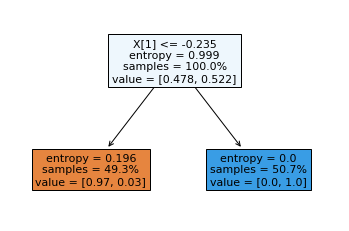

In [30]:
sklearn.tree.plot_tree( # Función que nos permite visualizar el árbol de decisión ajustado.
    tree, # Objeto de nuestro árbol de decisión entrenado.
    label = "all", # Etiquetamos todas características de cada nodo.
    proportion = True, # Visualizamos las proporciones de datos en cada nodo de decisión,
    filled=True, # Coloreamos los nodos
    fontsize=11, # Establecemos el tamaño de la letra del texto dentro de cada nodo.
)
plt.show()

In [31]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Este es el umbral de decisión del árbol de profundidad 1

C:\Users\ville\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


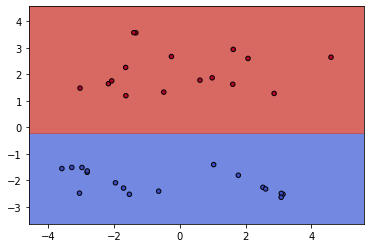

In [32]:
fig, ax = plt.subplots()
X0, X1 = simplest_features_test.x1, simplest_features_test.x2
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, tree, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=simplest_label_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()

Importamos un conjunto de datos más complejo que no es linealmente separable.

In [33]:
circles = pd.read_csv("data/circles.csv")

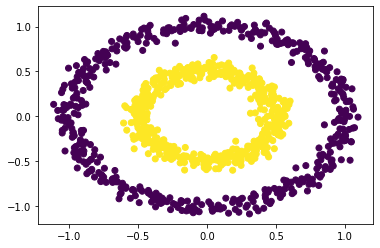

In [34]:
plt.scatter(
    circles.x1,
    circles.x2,
    c = circles.y # Pintamos nuestros puntos según la etiqueta que tengan
)

In [35]:
circles_features = circles.iloc[:,:-1]
circles_label = circles.y

In [36]:
circles_features_train, circles_features_test, circles_label_train, circles_label_test = sklearn.model_selection.train_test_split(
    circles_features,
    circles_label,
    test_size=0.33,
    random_state=11
)

In [37]:
tree1 = sklearn.tree.DecisionTreeClassifier(max_depth=2) # Instanciamos árbol de decisión de profundidad 2
tree1.fit(
    circles_features_train,
    circles_label_train
) # Ajustamos el árbol con los datos de entrenamiento

DecisionTreeClassifier(max_depth=2)

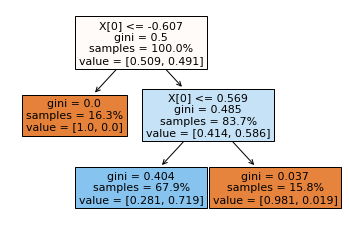

In [38]:
sklearn.tree.plot_tree( # Función que nos permite visualizar el árbol de decisión ajustado.
    tree1, # Objeto de nuestro árbol de decisión entrenado.
    label = "all", # Etiquetamos todas características de cada nodo.
    proportion = True, # Visualizamos las proporciones de datos en cada nodo de decisión,
    filled=True, # Coloreamos los nodos
    fontsize=11, # Establecemos el tamaño de la letra del texto dentro de cada nodo.
)
plt.show()

Así funciona un árbol de decisión de profundidad 2 sobre el conjunto de datos no linealmente separable.

C:\Users\ville\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


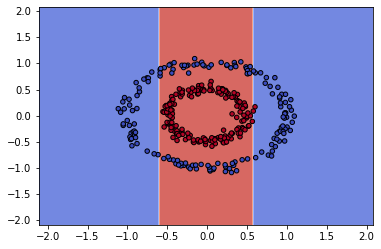

In [39]:
fig, ax = plt.subplots()
X0, X1 = circles_features_test.x1, circles_features_test.x2
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, tree1, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=circles_label_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()

### Actividad 3

¿Es suficiente una profundidad de 2 niveles para resolver la tarea?. 

**Programa un ciclo que entrene árboles de decisión variando sus profundidades y grafica cómo se comportan un par de metricas al variar este parámetro.**

In [40]:
# TODO: Ciclo que entrene árboles de decisión variando sus profundidades
for depth in range(15):
    pass

## Clasificando la presencia de cancer desde morfología nuclear

Importamos un conjunto de datos de clasificación de cancer. La descripción del conjunto de datos y un método de clasificación está descrito en el siguiente artículo.

https://www.sciencedirect.com/science/article/abs/pii/030438359490099X?via%3Dihub

In [41]:
wisconsin = pd.read_csv("data/wisconsin.csv") # Importamos el conjunto de datos

**Estos son fantomas de ejemplo y más abajo se describen sus características**
<div>
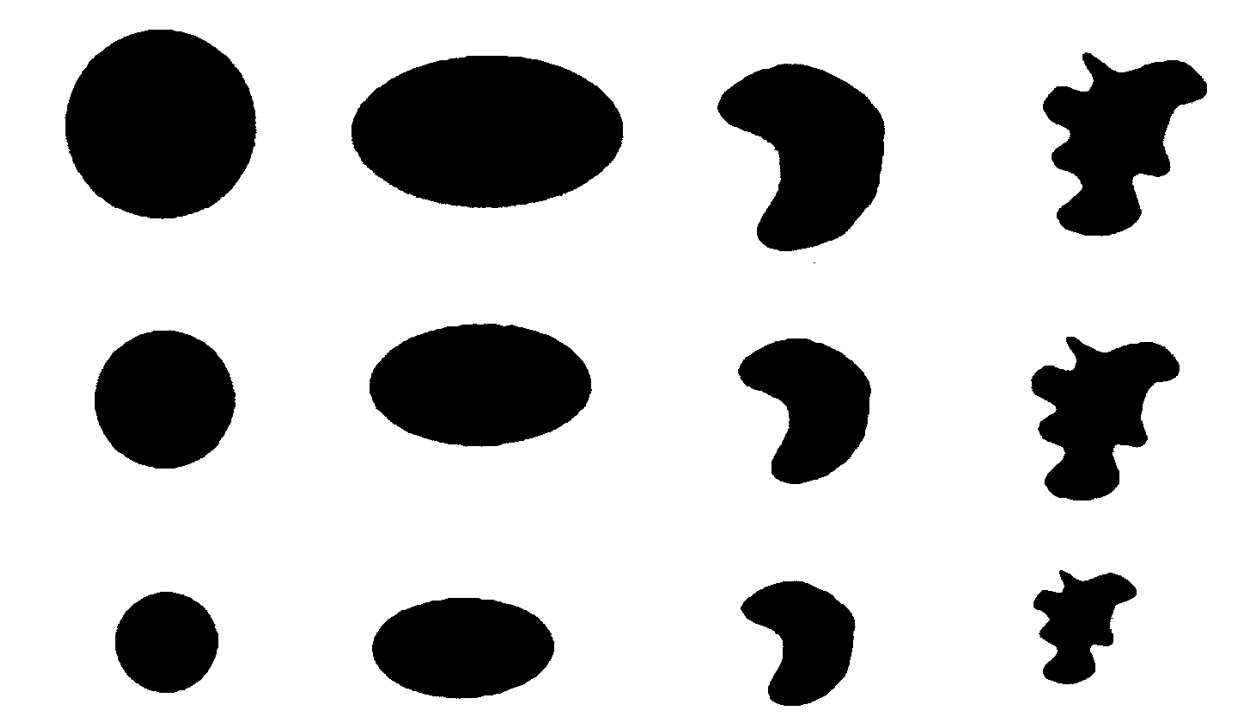
<div>
    
<div>
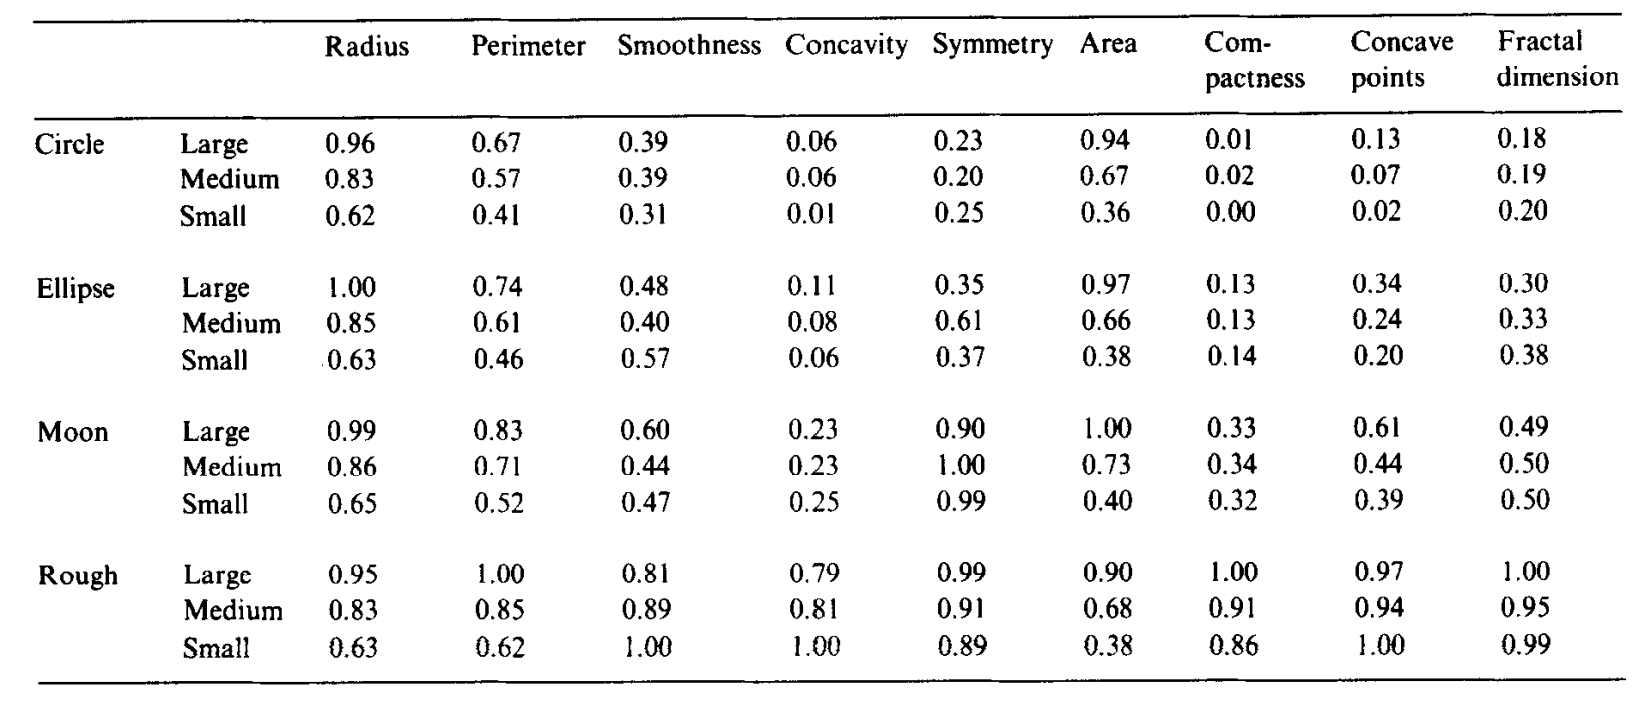
<div>

In [42]:
wisconsin.head() # Exploramos cómo se ve el conjunto de datos

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,B,13.540,14.36,87.46,566.3,9.779,8.129,6.664,4.781,1.885,...,15.110,19.26,99.70,711.2,144.000,1.773,239.000,1.288,2.977,7.259
1,B,13.080,15.71,85.63,520.0,1.075,127.000,4.568,311.000,1.967,...,14.500,20.49,96.09,630.5,1.312,2.776,189.000,7.283,3.184,8.183
2,B,9.504,12.44,60.34,273.9,1.024,6.492,2.956,2.076,1.815,...,10.230,15.66,65.13,314.9,1.324,1.148,8.867,6.227,245.000,7.773
3,B,13.030,18.42,82.61,523.8,8.983,3.766,2.562,2.923,1.467,...,13.300,22.81,84.46,545.9,9.701,4.619,4.833,5.013,1.987,6.169
4,B,8.196,16.84,51.71,201.9,86.000,5.943,1.588,5.917,1.769,...,8.964,21.96,57.26,242.2,1.297,1.357,688.000,2.564,3.105,7.409


Veamos si existe separabilidad visualmente utilizando combinaciones de características

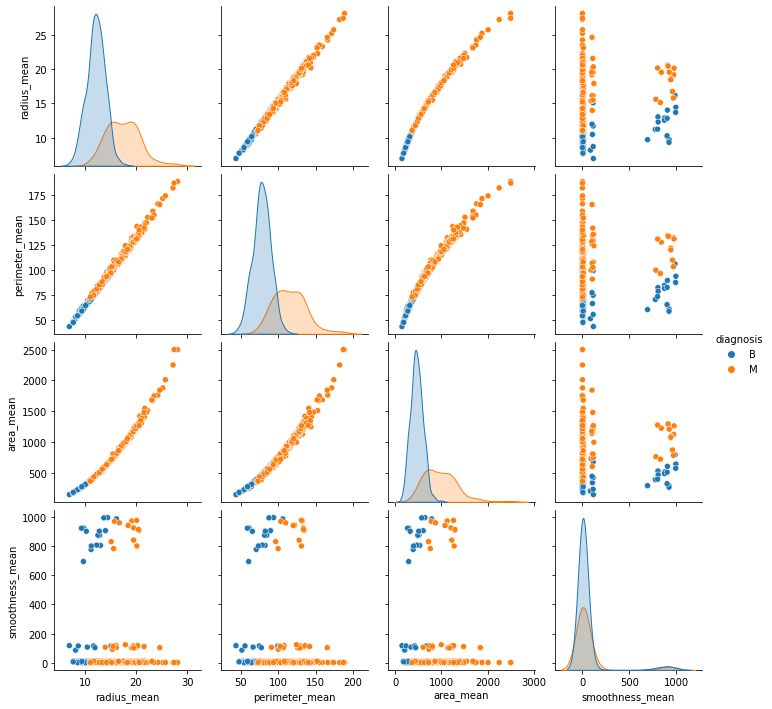

In [43]:
sns.pairplot( # La biblioteca seaborn está implementada sobre matplotlib y permite graficar visualizaciones más facilmente
    wisconsin.filter(regex="((smoothness|perimeter|area|radius).*mean|diagnosis)"), # Filtramos sólo algunas características
    hue="diagnosis" # Pintamos los puntos por la etiqueta de la observación
)

### Actividad 4

**Preprocesa los datos y entrena un modelo que clasifique el diagnóstico asociado a esa observación.**

In [44]:
# TODO: Preprocesamiento y entrenamiento de un modelo de clasificación para el conjunto de datos winsonsin.